<a href="https://colab.research.google.com/github/NeonRio/mnist_keras/blob/main/keras_mnist_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello. This is an mnist digit recognition project.
##In this project I have been created sequential neural network using keras api to recognise digits from images

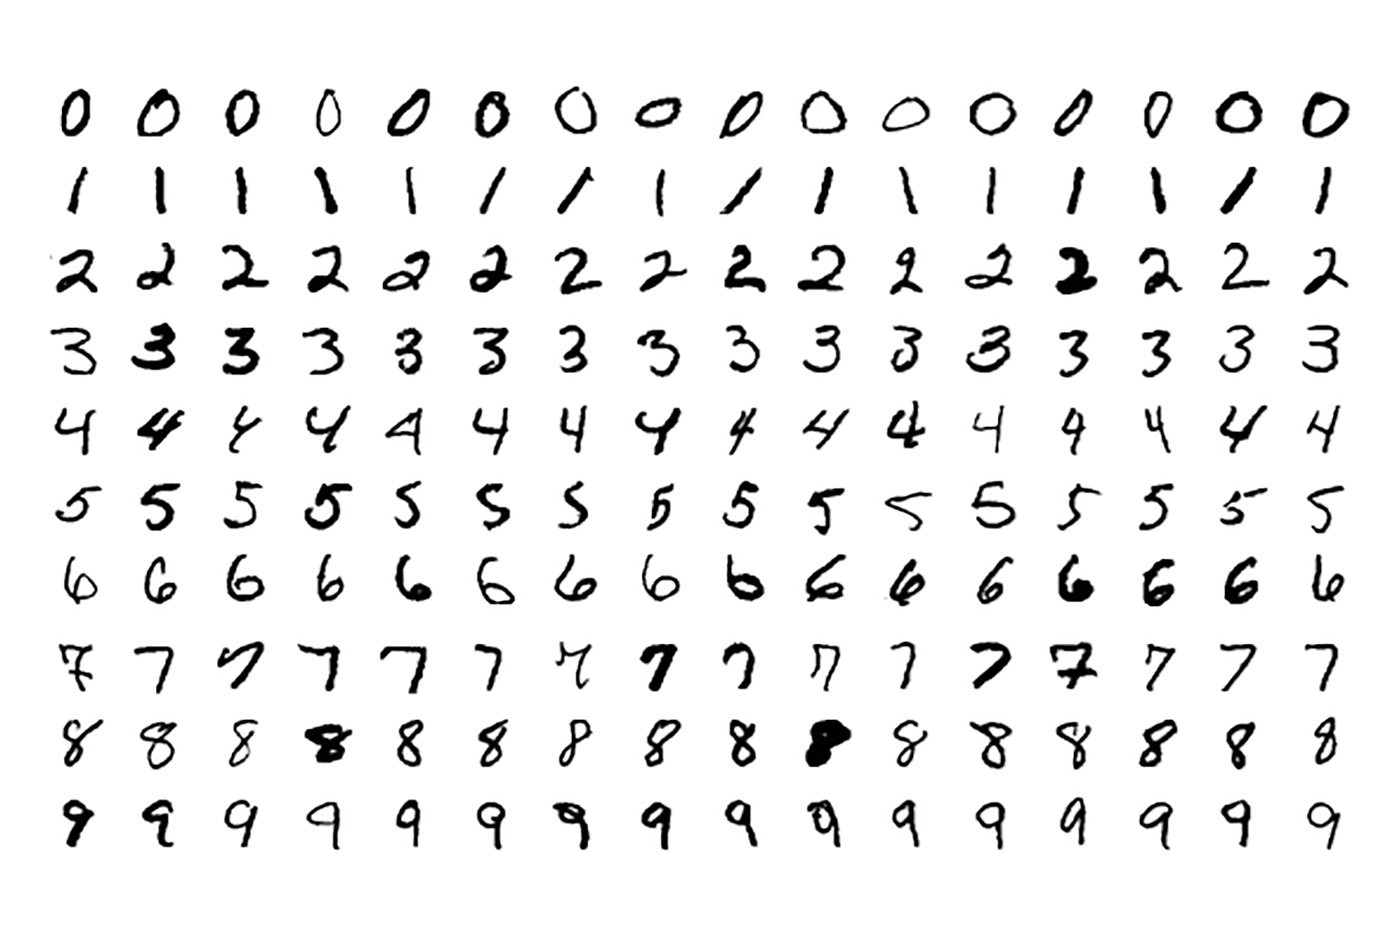

###Lets import dependencies that we need

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Getting images of digits and their labels and making them compatible with our neural network

In [92]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train=x_train.astype(np.float32).reshape(-1,28*28)/255
x_test=x_test.astype(np.float32).reshape(-1,28*28)/255
 
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [93]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### We gonna use GPU for faster training

In [94]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs available:",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs available: 1


### Creating our model with 4 layers.

1st layer - input, 
2nd layer - 128 neuron layer with relu activation, 
3rd layer - 128 neuron layer with relu activation, 
4rth layer - output



In [95]:
model = Sequential([
    Dense(units=128,activation='relu', input_shape=(784,)),
    Dense(units=128,activation='relu'),
    Dense(units=10, activation='softmax')
])

#### We gonna use adam optimizer and mean_squared_error loss (cause it is one of the simplest ones)

In [96]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#### Lets train our model

In [97]:
model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - accuracy: 0.9247 - val_loss: 0.0064 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9649 - val_loss: 0.0055 - val_accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0041 - accuracy: 0.9733 - val_loss: 0.0045 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 0.9783 - val_loss: 0.0044 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0028 - accuracy: 0.9829 - val_loss: 0.0041 - val_accuracy: 0.9737
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.9845 - val_loss: 0.0041 - val_accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9863 - val_loss: 0.0037 - val_accuracy:

### This code will give us short but useful information about our layers

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Wow, we have over 90 percent accuracy.
Thats cool, but is this model as good as we think? No. And I'm gonna tell you why

Lets get an image from our data and tell our model to predict which digit is pictured

In [107]:
prediction_real = model.predict(np.array([x_test[0]]))

In [108]:
np.argmax(prediction_real)

7

Neural Net thinks that it is 7 and as we can see in plot below thats right.

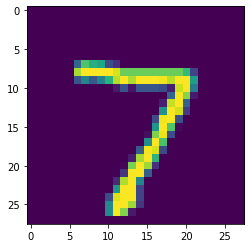

In [109]:
plt.imshow(x_test[0].reshape(28,28))

### But what if we give neural net a random pattern without digit pictured in it?

In [113]:
test = np.array([np.random.rand(28*28)])
test = test.astype(np.float32)
prediction_fake = model.predict(test)
np.argmax(prediction_fake)

5

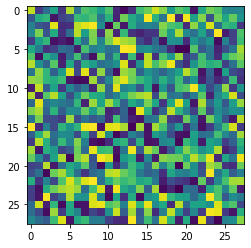

In [114]:
plt.imshow(test.reshape(28,28))

Neural Network will give us some answer, but as we can see in plot there are no number, it is just picture with random pixels. To solve this problem you need to use Convolutional Neural Networks.